## Importação dos dados

In [1]:
import numpy as np #Numpy para manipulações algébricas
import matplotlib.pyplot as plt #matplotlib para plotar gráficos
import pandas as pd #pandas para manipulação de dados
import seaborn as sns #seaborn visualização estatística
import matplotlib.ticker as ticker
from datetime import date
from itertools import *
import matplotlib.dates as mdates
import numpy as np
import time

In [2]:
# Configurações de plotagem
plt.rcParams.update({
    'font.size': 14,
    'xtick.color': 'black', #color: 'white' porque a tela é preta
    'ytick.color': 'black',
    'axes.labelcolor': 'black',
    'axes.titlecolor': 'black',
    'axes.titlesize': 20,
    'figure.figsize': (25,10)
})

# Configurando para warnings do pandas não aparecerem
pd.options.mode.chained_assignment = None

# Ignorando Future Warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [3]:
pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
df1 = pd.read_csv("2021-04-20 21_58_58Z.csv") # 01/01  a 15/01
df2 = pd.read_csv("2021-04-20 22_01_46Z.csv") # 16/01 a 31/01
df3 = pd.read_csv("2021-04-20 22_03_22Z.csv") # 01/02 a 15/02
df4 = pd.read_csv("2021-04-20 22_06_18Z.csv") # 16/02 a 31/02
df5 = pd.read_csv("2021-04-20 22_09_32Z.csv") # 01/03 a 15/03 
df6 = pd.read_csv("2021-04-20 22_12_22Z.csv") #16/03 a 31/03
df7 = pd.read_csv("2021-04-20 22_20_41Z.csv") #01/04 a 15/04

In [5]:
data = pd.concat([df1, df2, df3, df4, df5, df6, df7], ignore_index=True)
data

,Horário do trem,Site,Tipo de sensor,Número do veículo,Número do eixo do trem,Identificação do veículo,Número do eixo do veículo,Lateral do veículo,Velocidade do eixo,Extremidade do eixo,...,Alerta de espessura do friso,Altura do friso (mm),Alerta de altura do friso,Espessura da banda de rodagem (mm),Alerta de espessura da banda de rodagem,Cava na roda do trilho (mm),Alerta de cava na roda,Distância entre faces internas (mm),Alerta de distância entre as faces internas,Diâmetro da roda (mm)
0,15/01/2021 21:53:39,RH07 Linha 1,WPM,2,9,GDE 64374,4,L,55,A,...,0,"28,7",0,"37,7",0,"0,3",0,920.0,3,781.0
1,15/01/2021 21:53:39,RH07 Linha 1,WPM,2,9,GDE 64374,4,R,55,A,...,0,"28,7",0,"37,6",0,"0,4",0,920.0,3,779.0
2,15/01/2021 21:53:39,RH07 Linha 1,WPM,2,10,GDE 64374,3,L,55,A,...,0,"28,7",0,"36,4",0,"0,2",0,919.0,3,784.0
3,15/01/2021 21:53:39,RH07 Linha 1,WPM,2,10,GDE 64374,3,R,55,A,...,0,"28,9",0,"37,6",0,"0,5",0,919.0,3,780.0
4,15/01/2021 21:53:39,RH07 Linha 1,WPM,2,11,GDE 64374,2,L,55,A,...,0,"27,3",0,"45,4",0,0,0,919.0,3,799.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734946,01/04/2021 04:01:08,RH07 Linha 1,WPM,254,1022,GDE 207837,3,R,48,A,...,0,"32,8",0,"63,6",0,"3,2",0,921.0,3,845.0
1734947,01/04/2021 04:01:08,RH07 Linha 1,WPM,254,1023,GDE 207837,2,L,48,A,...,0,"31,9",0,"64,3",0,3,0,NaN,0,833.0
1734948,01/04/2021 04:01:08,RH07 Linha 1,WPM,254,1023,GDE 207837,2,R,48,A,...,0,"33,5",0,"61,5",0,"3,2",0,NaN,0,831.0
1734949,01/04/2021 04:01:08,RH07 Linha 1,WPM,254,1024,GDE 207837,1,L,48,A,...,0,"32,4",0,"65,3",0,"3,2",0,917.0,3,841.0


## Verificação de Dados faltantes inicial e drop de colunas desnecessárias

In [6]:
data.isnull().sum()[data.isnull().sum() != 0] 
# Visualização de variaveis com dados faltantes

Espessura da banda de rodagem (mm)      1671
Cava na roda do trilho (mm)                8
Distância entre faces internas (mm)    90916
Diâmetro da roda (mm)                  13122
dtype: int64

In [7]:
data.info() # Observar os tipos armazenados linhas: 1.734.951

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734951 entries, 0 to 1734950
Data columns (total 23 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Horário do trem                              object 
 1   Site                                         object 
 2   Tipo de sensor                               object 
 3   Número do veículo                            int64  
 4   Número do eixo do trem                       int64  
 5   Identificação do veículo                     object 
 6   Número do eixo do veículo                    int64  
 7   Lateral do veículo                           object 
 8   Velocidade do eixo                           int64  
 9   Extremidade do eixo                          object 
 10  Direção                                      object 
 11  Lateral da linha                             object 
 12  Espessura do friso (mm)                      object 
 13  Alerta de es

In [8]:
# Separando data e hora para poder categorizar de acordo com a data
data['Horário do trem'] = pd.to_datetime(data['Horário do trem'], format='%d/%m/%Y  %H:%M:%S')
data = data.sort_values(by=['Horário do trem'])
data['Dia do trem'] = data['Horário do trem'].dt.strftime("%d/%m/%Y")
data['Hora do trem'] = data['Horário do trem'].dt.strftime("%H:%M:%S")

In [9]:
# Remoção de colunas que não queremos analisar
sem_valor = ['Site', 'Tipo de sensor', 'Direção', 'Distância entre faces internas (mm)', 'Alerta de distância entre as faces internas','Horário do trem', 'Hora do trem']
data.drop(sem_valor, axis =1, inplace=True) 

In [10]:
# Função que troca vírgula por ponto para ser lido como float e não object
def vporp (data, name):
    data[name] = data[name].str.replace(',', '.')

In [11]:
aux = ['Espessura do friso (mm)',
       'Altura do friso (mm)', 
       'Espessura da banda de rodagem (mm)',
       'Cava na roda do trilho (mm)'] #Colunas númericas com vírgula

for name in aux:
    vporp(data,name)

data[aux] = data[aux].astype('float64') # Mudando de object para float

## Analisando a quantidade de amostra e dados

In [34]:
# Função que visualiza quantos dados diferentes possuiamos
def lencat (df):
    for col in df.columns:
        df_group = df[col].value_counts()
        print( str(col) + ' = ' + str(len(df_group)))

In [13]:
lencat(data)

Número do veículo = 346
Número do eixo do trem = 1392
Identificação do veículo = 11559
Número do eixo do veículo = 4
Lateral do veículo = 2
Velocidade do eixo = 58
Extremidade do eixo = 2
Lateral da linha = 2
Espessura do friso (mm) = 208
Alerta de espessura do friso = 5
Altura do friso (mm) = 141
Alerta de altura do friso = 4
Espessura da banda de rodagem (mm) = 684
Alerta de espessura da banda de rodagem = 5
Cava na roda do trilho (mm) = 64
Alerta de cava na roda = 3
Diâmetro da roda (mm) = 161
Dia do trem = 105


In [14]:
# Função que visualiza a quantidade de vezes que se repetem um dado
def manycat (df):
    for col in df.columns:
        df_group = df[col].value_counts()
        print( str(col) + '\n \n' + str(df_group) + '\n')

## Reduzir o número de vagões analisados

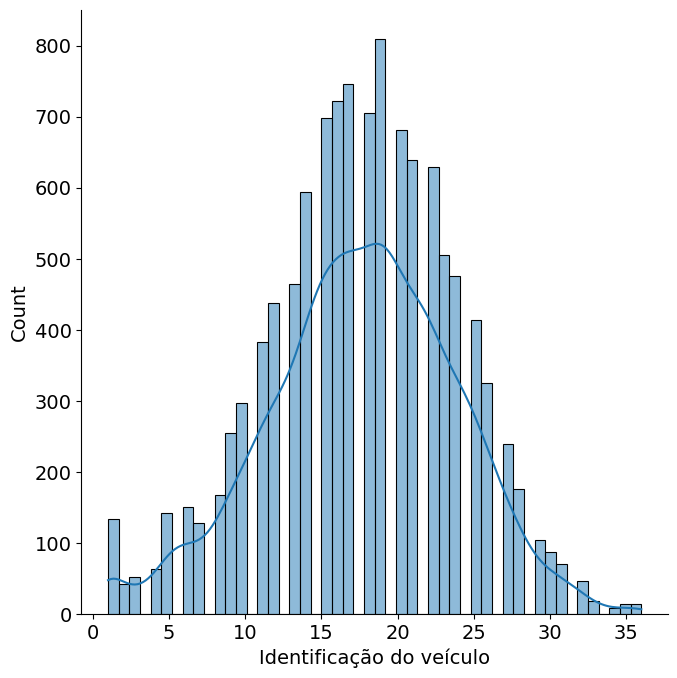

In [22]:
# números de vezes que um vagão passou por o sensor de medição
n_vagao = (data['Identificação do veículo'].value_counts())/8
sns.displot(x = n_vagao, kde=True, height=7, aspect= 1)
plt.show()

### Drop das datas com  NA 

In [23]:
# Identificando os NA
df = data[data.isna().any(axis=1)] # matriz com todos os dados NA
df_list = df['Identificação do veículo'].value_counts().index.tolist()

In [24]:
df # com 13.729 linhas

,Número do veículo,Número do eixo do trem,Identificação do veículo,Número do eixo do veículo,Lateral do veículo,Velocidade do eixo,Extremidade do eixo,Lateral da linha,Espessura do friso (mm),Alerta de espessura do friso,Altura do friso (mm),Alerta de altura do friso,Espessura da banda de rodagem (mm),Alerta de espessura da banda de rodagem,Cava na roda do trilho (mm),Alerta de cava na roda,Diâmetro da roda (mm),Dia do trem


In [19]:
# Drop todos os dias de um determinado vagão que possui algum 
#elemento NA
id = []

for row in df_list:
    list_day = df.groupby(['Identificação do veículo']).get_group(row)['Dia do trem'].value_counts().index.tolist()
    id.extend(data[(data['Dia do trem'].apply(lambda x: x in list_day)) & (data['Identificação do veículo'] == row)].index.tolist())

data.drop(id, inplace=True)

KeyboardInterrupt: 

In [25]:
data.isnull().sum()[data.isnull().sum() != 0] 

Series([], dtype: int64)

In [ ]:
n_vagao = (data['Identificação do veículo'].value_counts())/8
sns.displot(x = n_vagao, kde=True, height=7, aspect= 1)
plt.show()

In [ ]:
data.to_csv("datx.csv") 
#dados sem NA, sem colunas desnecessárias, com data apenas e ponto.

In [29]:
data.info() # linhas: 1.672.671

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1672671 entries, 272478 to 1459219
Data columns (total 18 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   Número do veículo                        1672671 non-null  int64  
 1   Número do eixo do trem                   1672671 non-null  int64  
 2   Identificação do veículo                 1672671 non-null  object 
 3   Número do eixo do veículo                1672671 non-null  int64  
 4   Lateral do veículo                       1672671 non-null  object 
 5   Velocidade do eixo                       1672671 non-null  int64  
 6   Extremidade do eixo                      1672671 non-null  object 
 7   Lateral da linha                         1672671 non-null  object 
 8   Espessura do friso (mm)                  1672671 non-null  float64
 9   Alerta de espessura do friso             1672671 non-null  int64  
 10  Altura do fri

### Drop de datas duplicadas para um mesmo conjunto

In [31]:
data = data.drop_duplicates(subset=['Identificação do veículo','Número do eixo do veículo','Lateral do veículo','Dia do trem'])

In [32]:
data.info() # linhas: 1.619.049

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1619049 entries, 272478 to 1459219
Data columns (total 18 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   Número do veículo                        1619049 non-null  int64  
 1   Número do eixo do trem                   1619049 non-null  int64  
 2   Identificação do veículo                 1619049 non-null  object 
 3   Número do eixo do veículo                1619049 non-null  int64  
 4   Lateral do veículo                       1619049 non-null  object 
 5   Velocidade do eixo                       1619049 non-null  int64  
 6   Extremidade do eixo                      1619049 non-null  object 
 7   Lateral da linha                         1619049 non-null  object 
 8   Espessura do friso (mm)                  1619049 non-null  float64
 9   Alerta de espessura do friso             1619049 non-null  int64  
 10  Altura do fri

### Drop de datas faltantes para um mesmo vagão (não NA)

In [26]:
n_vagao = (data['Identificação do veículo'].value_counts())/8

In [27]:
n_vagao_int = []
n_vagao_dec = [] # antes de dropar duplicatas era 639 e foi para 603
for i in range(len(n_vagao)):
    n = int(n_vagao[i])
    v = n_vagao[i]
    m = v*10
    s = n*10
    if m == s:
        n_vagao_int.append(n_vagao.index[i])
    else:
        n_vagao_dec.append(n_vagao.index[i])

In [28]:
n_vagao_dec

[]

In [35]:
for a in n_vagao_dec: 
    dia1 = data.loc[(data['Identificação do veículo'] == a) & (data['Número do eixo do veículo'] == 1) & (data['Lateral do veículo'] == 'R')]['Dia do trem']
    dia2 = data.loc[(data['Identificação do veículo'] == a) & (data['Número do eixo do veículo'] == 2) & (data['Lateral do veículo'] == 'R')]['Dia do trem']
    dia3 = data.loc[(data['Identificação do veículo'] == a) & (data['Número do eixo do veículo'] == 3) & (data['Lateral do veículo'] == 'R')]['Dia do trem']
    dia4 = data.loc[(data['Identificação do veículo'] == a) & (data['Número do eixo do veículo'] == 4) & (data['Lateral do veículo'] == 'R')]['Dia do trem']
    dia5 = data.loc[(data['Identificação do veículo'] == a) & (data['Número do eixo do veículo'] == 1) & (data['Lateral do veículo'] == 'L')]['Dia do trem']
    dia6 = data.loc[(data['Identificação do veículo'] == a) & (data['Número do eixo do veículo'] == 2) & (data['Lateral do veículo'] == 'L')]['Dia do trem']
    dia7 = data.loc[(data['Identificação do veículo'] == a) & (data['Número do eixo do veículo'] == 3) & (data['Lateral do veículo'] == 'L')]['Dia do trem']
    dia8 = data.loc[(data['Identificação do veículo'] == a) & (data['Número do eixo do veículo'] == 4) & (data['Lateral do veículo'] == 'L')]['Dia do trem']
    df = list((set(dia1) | set(dia2) | set(dia3) | set(dia4) | set(dia5) | set(dia6) | set(dia7) | set(dia8)) - (set(dia1) & set(dia2) & set(dia3) & set(dia4) & set(dia5) & set(dia6) & set(dia7) & set(dia8)))
    index_names = data[(data['Dia do trem'].apply(lambda x: x in df)) & (data['Identificação do veículo'] == a)].index.tolist()

    # from dataFrame
    data.drop(index_names, inplace = True)
    

In [36]:
data.to_csv("datx1.csv") 
# dados sem dados faltantes, sem datas duplicadas, 

In [37]:
data.info() # linhas: 1.615.016

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1615016 entries, 272478 to 1459219
Data columns (total 18 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   Número do veículo                        1615016 non-null  int64  
 1   Número do eixo do trem                   1615016 non-null  int64  
 2   Identificação do veículo                 1615016 non-null  object 
 3   Número do eixo do veículo                1615016 non-null  int64  
 4   Lateral do veículo                       1615016 non-null  object 
 5   Velocidade do eixo                       1615016 non-null  int64  
 6   Extremidade do eixo                      1615016 non-null  object 
 7   Lateral da linha                         1615016 non-null  object 
 8   Espessura do friso (mm)                  1615016 non-null  float64
 9   Alerta de espessura do friso             1615016 non-null  int64  
 10  Altura do fri

### Dropando outliers

### Determinando o minimo de amostra

In [19]:
data = pd.read_csv("datx1.csv")

In [30]:
data

,Número do veículo,Número do eixo do trem,Identificação do veículo,Número do eixo do veículo,Lateral do veículo,Velocidade do eixo,Extremidade do eixo,Lateral da linha,Espessura do friso (mm),Alerta de espessura do friso,Altura do friso (mm),Alerta de altura do friso,Espessura da banda de rodagem (mm),Alerta de espessura da banda de rodagem,Cava na roda do trilho (mm),Alerta de cava na roda,Diâmetro da roda (mm),Dia do trem
0,86,348,GDE 212465,4,L,56,B,Próximo,32.3,0,29.1,0,73.8,0,0.3,0,851.0,01/01/2021
1,87,349,GDE 212464,1,R,56,B,Distante,29.7,0,28.5,0,63.8,0,0.2,0,830.0,01/01/2021
2,87,349,GDE 212464,1,L,56,B,Próximo,29.7,0,28.9,0,62.4,0,0.2,0,833.0,01/01/2021
3,87,350,GDE 212464,2,R,56,B,Distante,26.4,0,27.2,0,61.3,0,0.4,0,829.0,01/01/2021
4,87,350,GDE 212464,2,L,56,B,Próximo,26.0,0,27.8,0,61.2,0,0.3,0,830.0,01/01/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615011,177,713,GDE 205430,4,L,51,A,Distante,24.9,0,27.2,0,66.6,0,0.1,0,844.0,15/04/2021
1615012,177,713,GDE 205430,4,R,51,A,Próximo,25.8,0,28.6,0,65.8,0,0.0,0,844.0,15/04/2021
1615013,177,714,GDE 205430,3,L,51,A,Distante,24.3,0,26.9,0,69.9,0,0.0,0,848.0,15/04/2021
1615014,175,707,GDE 213800,2,R,51,A,Próximo,28.6,0,30.7,0,73.3,0,0.0,0,853.0,15/04/2021


In [29]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

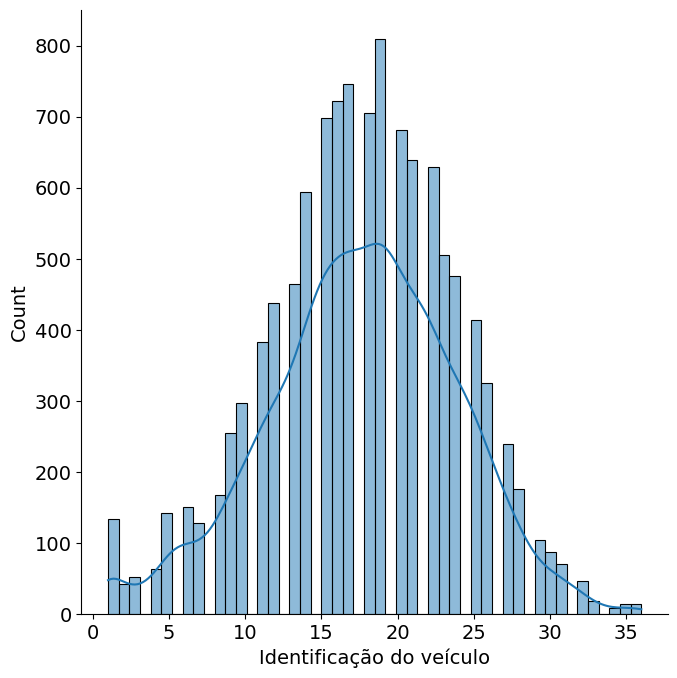

In [31]:
n_vagao = (data['Identificação do veículo'].value_counts())/8
sns.displot(x = n_vagao, kde=True, height=7, aspect= 1)
plt.show()

In [32]:
n_vagao.value_counts()

19.0    810
17.0    747
16.0    723
18.0    705
15.0    698
20.0    682
21.0    639
22.0    630
14.0    595
23.0    505
24.0    476
13.0    465
12.0    438
25.0    414
11.0    383
26.0    325
10.0    297
9.0     255
27.0    240
28.0    176
8.0     168
6.0     151
5.0     142
1.0     134
7.0     129
29.0    104
30.0     88
31.0     70
4.0      64
3.0      52
32.0     47
2.0      42
33.0     19
35.0     15
36.0     14
34.0      9
Name: Identificação do veículo, dtype: int64

In [35]:
lencat(data) # Identificação do veículo: 11.451

Número do veículo = 346
Número do eixo do trem = 1392
Identificação do veículo = 11451
Número do eixo do veículo = 4
Lateral do veículo = 2
Velocidade do eixo = 58
Extremidade do eixo = 2
Lateral da linha = 2
Espessura do friso (mm) = 201
Alerta de espessura do friso = 5
Altura do friso (mm) = 135
Alerta de altura do friso = 4
Espessura da banda de rodagem (mm) = 675
Alerta de espessura da banda de rodagem = 5
Cava na roda do trilho (mm) = 62
Alerta de cava na roda = 2
Diâmetro da roda (mm) = 159
Dia do trem = 105


In [44]:
# drop vagões com n_vagao menor
list_vagao = n_vagao.loc[n_vagao <= 10].index.tolist()
list_idx = data.loc[data['Identificação do veículo'].apply(lambda x: x in list_vagao)].index.tolist()
data.drop(list_idx, axis = 0,inplace=True)

In [36]:
list_vagao = n_vagao.loc[n_vagao <= 10].index.tolist()
datax = data.loc[data['Identificação do veículo'].apply(lambda x: x in list_vagao)]

In [37]:
datax

,Número do veículo,Número do eixo do trem,Identificação do veículo,Número do eixo do veículo,Lateral do veículo,Velocidade do eixo,Extremidade do eixo,Lateral da linha,Espessura do friso (mm),Alerta de espessura do friso,Altura do friso (mm),Alerta de altura do friso,Espessura da banda de rodagem (mm),Alerta de espessura da banda de rodagem,Cava na roda do trilho (mm),Alerta de cava na roda,Diâmetro da roda (mm),Dia do trem
147,68,273,GDE 218993,1,R,56,B,Distante,25.2,0,28.6,0,25.2,0,0.2,0,751.0,01/01/2021
148,68,273,GDE 218993,1,L,56,B,Próximo,24.6,0,28.7,0,25.0,0,0.5,0,742.0,01/01/2021
149,68,274,GDE 218993,2,R,56,B,Distante,24.9,0,28.3,0,22.5,1,0.3,0,756.0,01/01/2021
151,68,274,GDE 218993,2,L,56,B,Próximo,24.4,0,28.8,0,21.3,3,0.5,0,750.0,01/01/2021
152,68,275,GDE 218993,3,L,56,B,Próximo,23.5,0,28.4,0,23.2,1,0.3,0,747.0,01/01/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1614847,194,782,GDE 64447,3,R,51,A,Próximo,24.0,0,26.8,0,36.5,0,0.0,0,780.0,15/04/2021
1614848,194,783,GDE 64447,2,L,51,A,Distante,26.0,0,27.0,0,38.5,0,0.0,0,779.0,15/04/2021
1614849,194,783,GDE 64447,2,R,51,A,Próximo,26.4,0,26.6,0,40.6,0,0.0,0,779.0,15/04/2021
1614850,194,784,GDE 64447,1,L,51,A,Distante,24.6,0,27.4,0,44.3,0,0.0,0,788.0,15/04/2021


In [45]:
lencat(data) # Identificação do veículo: de 11.451 para 10.017 (n_vagao <= 10)

Número do veículo = 346
Número do eixo do trem = 1392
Identificação do veículo = 10017
Número do eixo do veículo = 4
Lateral do veículo = 2
Velocidade do eixo = 58
Extremidade do eixo = 2
Lateral da linha = 2
Espessura do friso (mm) = 199
Alerta de espessura do friso = 5
Altura do friso (mm) = 132
Alerta de altura do friso = 4
Espessura da banda de rodagem (mm) = 664
Alerta de espessura da banda de rodagem = 5
Cava na roda do trilho (mm) = 61
Alerta de cava na roda = 2
Diâmetro da roda (mm) = 158
Dia do trem = 105


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1536952 entries, 0 to 1615015
Data columns (total 18 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   Número do veículo                        1536952 non-null  int64  
 1   Número do eixo do trem                   1536952 non-null  int64  
 2   Identificação do veículo                 1536952 non-null  object 
 3   Número do eixo do veículo                1536952 non-null  int64  
 4   Lateral do veículo                       1536952 non-null  object 
 5   Velocidade do eixo                       1536952 non-null  int64  
 6   Extremidade do eixo                      1536952 non-null  object 
 7   Lateral da linha                         1536952 non-null  object 
 8   Espessura do friso (mm)                  1536952 non-null  float64
 9   Alerta de espessura do friso             1536952 non-null  int64  
 10  Altura do friso (m

In [38]:
# definição dos grupos
datax['Dia do trem'] = pd.to_datetime(datax['Dia do trem'], format='%d/%m/%Y')
vagao = datax['Identificação do veículo'].value_counts().index.tolist()
lado = ['R','L']
eixo = [1,2,3,4]

In [39]:
for (a,b,c) in product(vagao,lado,eixo):
    data_group = datax.groupby(['Identificação do veículo','Lateral do veículo','Número do eixo do veículo']).get_group((a,b,c)) #a = nome do vagão, b = R ou L e c = 1,2,3 ou 4)
    idx = data_group.index.tolist()

    data_group['Intervalo de Dias'] = data_group.loc[:,['Dia do trem']] - data_group.loc[idx[0],['Dia do trem']]
    data_group['Variação da Espessura do friso (mm)'] = data_group.loc[:,['Espessura do friso (mm)']] - data_group.loc[idx[0],['Espessura do friso (mm)']] 
    data_group['Variação da Altura do friso (mm)'] = data_group.loc[:,['Altura do friso (mm)']] - data_group.loc[idx[0],['Altura do friso (mm)']]
    data_group['Variação da Espessura da banda de rodagem (mm)'] = data_group.loc[:,['Espessura da banda de rodagem (mm)']] - data_group.loc[idx[0],['Espessura da banda de rodagem (mm)']]   
    data_group['Variação da Cava na roda do trilho (mm)'] = data_group.loc[:,['Cava na roda do trilho (mm)']] - data_group.loc[idx[0],['Cava na roda do trilho (mm)']] 
    data_group['Variação do Diâmetro da roda (mm)'] = data_group.loc[:,['Diâmetro da roda (mm)']] - data_group.loc[idx[0],['Diâmetro da roda (mm)']] 

    datax.loc[ idx, ['Intervalo de Dias']] = data_group.loc[ idx, ['Intervalo de Dias']]
    datax.loc[ idx, ['Variação da Espessura do friso (mm)']] = data_group.loc[ idx, ['Variação da Espessura do friso (mm)']]
    datax.loc[ idx, ['Variação da Altura do friso (mm)']] = data_group.loc[ idx, ['Variação da Altura do friso (mm)']]
    datax.loc[ idx, ['Variação da Espessura da banda de rodagem (mm)']] = data_group.loc[ idx, ['Variação da Espessura da banda de rodagem (mm)']]
    datax.loc[ idx, ['Variação da Cava na roda do trilho (mm)']] = data_group.loc[ idx, ['Variação da Cava na roda do trilho (mm)']]
    datax.loc[ idx, ['Variação do Diâmetro da roda (mm)']] = data_group.loc[ idx, ['Variação do Diâmetro da roda (mm)']]

In [40]:
datax.isna().sum()

Número do veículo                                 0
Número do eixo do trem                            0
Identificação do veículo                          0
Número do eixo do veículo                         0
Lateral do veículo                                0
Velocidade do eixo                                0
Extremidade do eixo                               0
Lateral da linha                                  0
Espessura do friso (mm)                           0
Alerta de espessura do friso                      0
Altura do friso (mm)                              0
Alerta de altura do friso                         0
Espessura da banda de rodagem (mm)                0
Alerta de espessura da banda de rodagem           0
Cava na roda do trilho (mm)                       0
Alerta de cava na roda                            0
Diâmetro da roda (mm)                             0
Dia do trem                                       0
Intervalo de Dias                                 0
Variação da 

In [41]:
datax['Intervalo de Dias'] = (pd.to_timedelta(datax['Intervalo de Dias'], unit = 'D')).dt.days
aux = ['Variação da Espessura do friso (mm)', 'Variação da Altura do friso (mm)', 'Variação da Espessura da banda de rodagem (mm)', 'Variação da Cava na roda do trilho (mm)', 'Variação do Diâmetro da roda (mm)']
datax[aux] = datax[aux].astype('float64')

In [43]:
def porroda (df, columns1):
    palette = sns.color_palette("mako_r", 4)
    for coluna in columns1:
        g = sns.relplot(x="Intervalo de Dias", y= coluna , hue="Número do eixo do veículo", 
                        style="Número do eixo do veículo", col="Lateral do veículo", data = df, palette= palette)
        g.tight_layout()
        g.savefig("plotz9" + str(coluna) + ".pdf", bbox_inches='tight')
        plt.show()

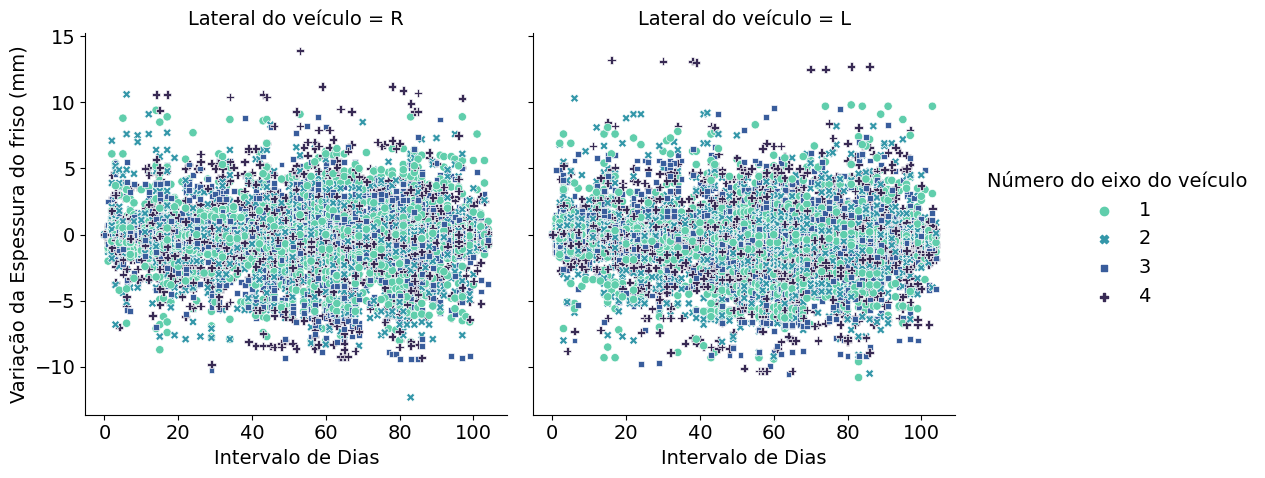

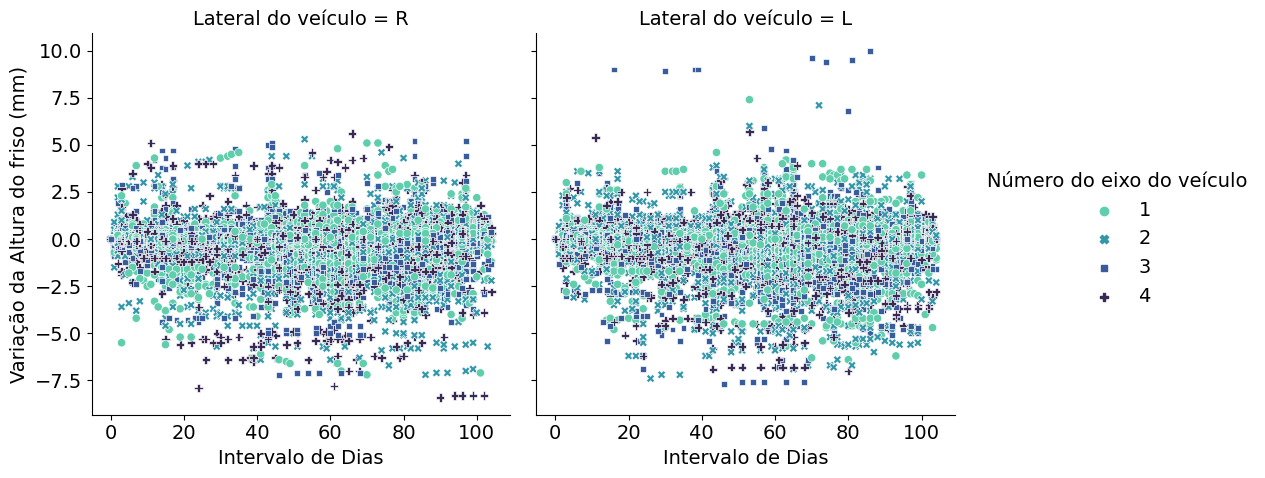

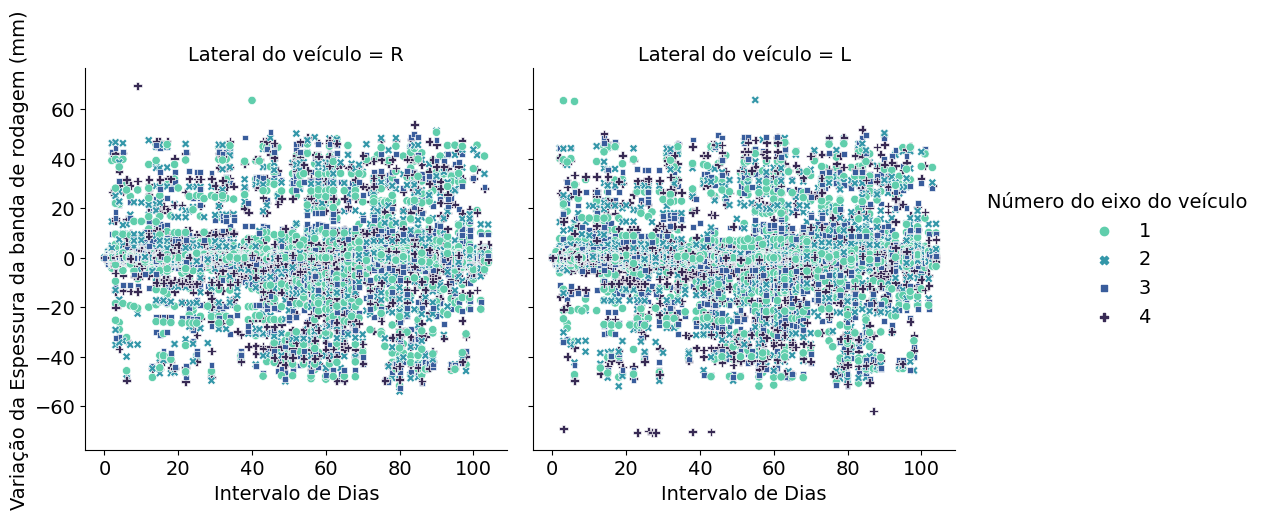

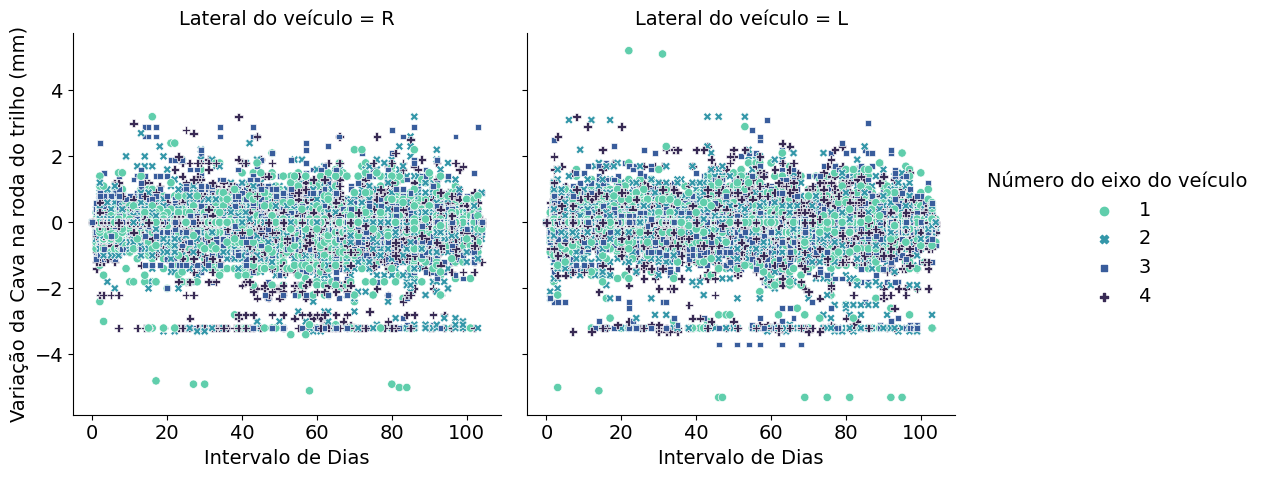

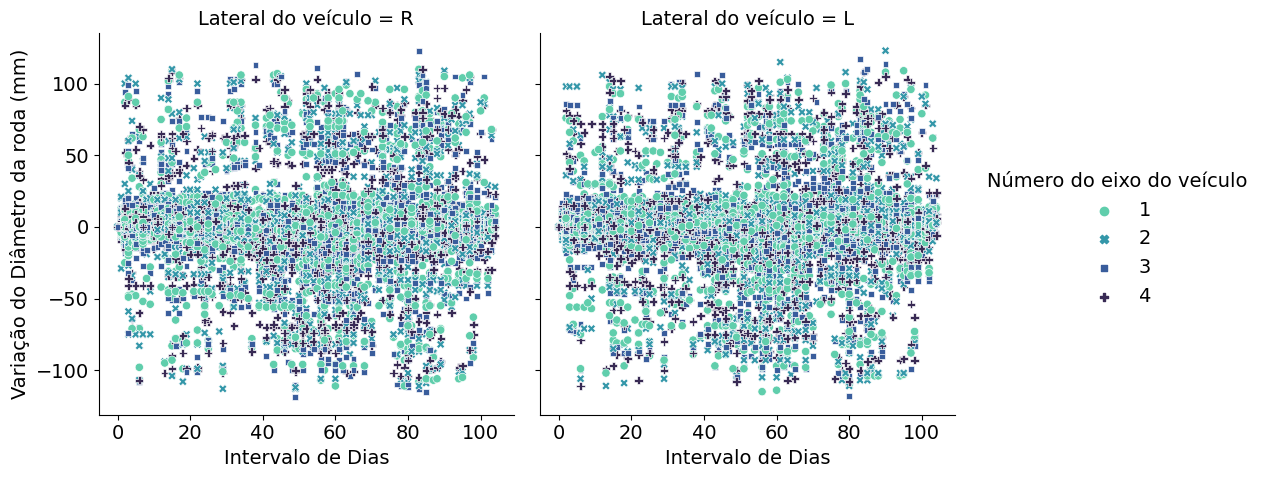

In [44]:
columns1 = ['Variação da Espessura do friso (mm)', 'Variação da Altura do friso (mm)', 'Variação da Espessura da banda de rodagem (mm)', 'Variação da Cava na roda do trilho (mm)', 'Variação do Diâmetro da roda (mm)']
porroda(datax, columns1)

In [4]:
data.to_csv("datz4.csv")
# Com normalização dos dados com outliers

NameError: name 'data' is not defined

In [42]:
datax.to_csv("data-10.csv")
# com n_vagao menor ou igual a 10

In [4]:
data = pd.read_csv("datz5.csv")

In [5]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data

,Número do veículo,Número do eixo do trem,Identificação do veículo,Número do eixo do veículo,Lateral do veículo,Velocidade do eixo,Extremidade do eixo,Lateral da linha,Espessura do friso (mm),Alerta de espessura do friso,...,Mean_Variação da Espessura do friso (mm),Mean_Variação da Altura do friso (mm),Mean_Variação da Espessura da banda de rodagem (mm),Mean_Variação da Cava na roda do trilho (mm),Mean_Variação do Diâmetro da roda (mm),Std_Variação da Espessura do friso (mm),Std_Variação da Altura do friso (mm),Std_Variação da Espessura da banda de rodagem (mm),Std_Variação da Cava na roda do trilho (mm),Std_Variação do Diâmetro da roda (mm)
0,86,348,GDE 212465,4,L,56,B,Próximo,32.3,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,87,349,GDE 212464,1,R,56,B,Distante,29.7,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,87,349,GDE 212464,1,L,56,B,Próximo,29.7,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,87,350,GDE 212464,2,R,56,B,Distante,26.4,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,87,350,GDE 212464,2,L,56,B,Próximo,26.0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536947,177,713,GDE 205430,4,L,51,A,Distante,24.9,0,...,-0.216505,0.141100,0.784142,-0.102589,2.401294,1.328613,0.984635,8.263244,0.466188,17.667220
1536948,177,713,GDE 205430,4,R,51,A,Próximo,25.8,0,...,-0.283495,0.095793,0.500000,-0.094822,1.349515,1.356688,0.957955,8.211138,0.446748,17.415497
1536949,177,714,GDE 205430,3,L,51,A,Distante,24.3,0,...,-0.270227,0.081553,0.750162,-0.104854,2.844660,1.617082,0.990548,8.320369,0.486515,17.702130
1536950,175,707,GDE 213800,2,R,51,A,Próximo,28.6,0,...,-0.298893,0.176072,0.211342,-0.078285,1.260028,1.176748,0.837980,6.411080,0.420475,14.212725


In [53]:
data.loc[data['Identificação do veículo'].apply(lambda x: x in ['GDE 214131','GDE 218829'])]

,Número do veículo,Número do eixo do trem,Identificação do veículo,Número do eixo do veículo,Lateral do veículo,Velocidade do eixo,Extremidade do eixo,Lateral da linha,Espessura do friso (mm),Alerta de espessura do friso,...,Mean_Variação da Espessura do friso (mm),Mean_Variação da Altura do friso (mm),Mean_Variação da Espessura da banda de rodagem (mm),Mean_Variação da Cava na roda do trilho (mm),Mean_Variação do Diâmetro da roda (mm),Std_Variação da Espessura do friso (mm),Std_Variação da Altura do friso (mm),Std_Variação da Espessura da banda de rodagem (mm),Std_Variação da Cava na roda do trilho (mm),Std_Variação do Diâmetro da roda (mm)
42843,49,201,GDE 214131,1,R,50,B,Distante,28.0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
42844,49,201,GDE 214131,1,L,50,B,Próximo,28.5,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
42845,49,202,GDE 214131,2,R,50,B,Distante,30.6,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
42846,49,202,GDE 214131,2,L,50,B,Próximo,31.6,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
42847,49,203,GDE 214131,3,R,50,B,Distante,24.5,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487742,110,446,GDE 218829,3,R,52,A,Próximo,26.1,0,...,-0.166452,0.177978,0.054733,-0.005860,0.990985,1.423605,0.919171,7.799905,0.551823,16.921702
1487820,110,447,GDE 218829,2,L,52,A,Distante,21.2,2,...,-0.160567,0.163724,0.028479,-0.019781,0.953608,1.398177,0.977822,7.920550,0.567735,16.890795
1487822,110,448,GDE 218829,1,L,52,A,Distante,23.8,0,...,-0.111011,0.130071,0.064263,-0.009594,0.877656,1.367640,0.837470,7.685876,0.508945,16.491656
1487872,110,447,GDE 218829,2,R,52,A,Próximo,22.7,1,...,-0.242977,0.156314,0.088918,-0.023067,0.991624,1.337517,0.967232,7.835912,0.514981,16.936086


In [58]:
def porvagao (df, columns1):
    palette = sns.color_palette("mako_r", 4)
    for coluna in columns1:
        g = sns.relplot(x="Intervalo de Dias", y= coluna , hue="Identificação do veículo", 
                        style="Número do eixo do veículo", col="Lateral do veículo", data = df, palette= palette)
        g.tight_layout()
        g.savefig("plotz8" + str(coluna) + ".pdf", bbox_inches='tight')
        plt.show()

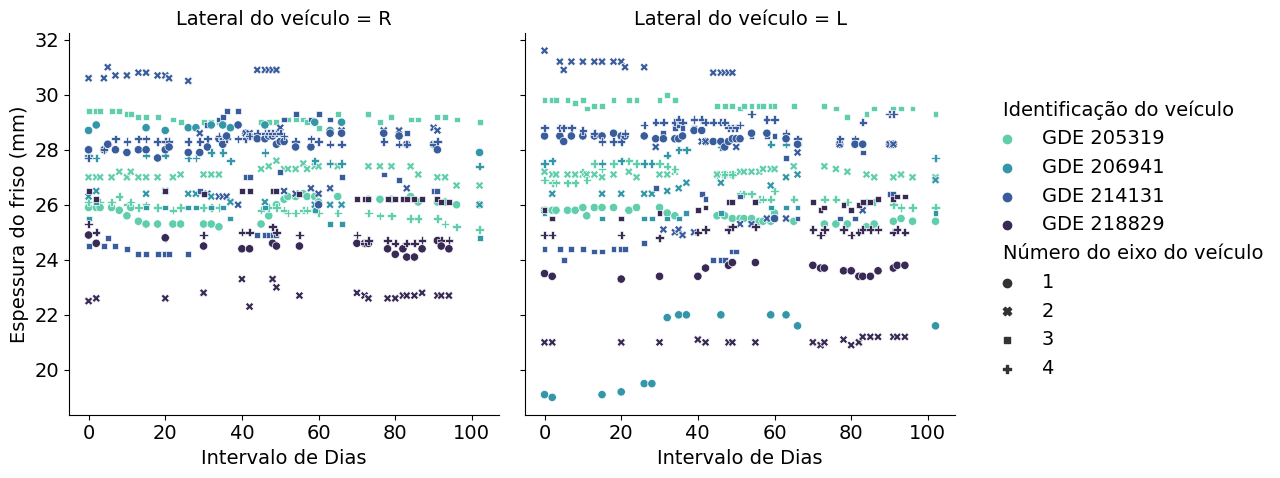

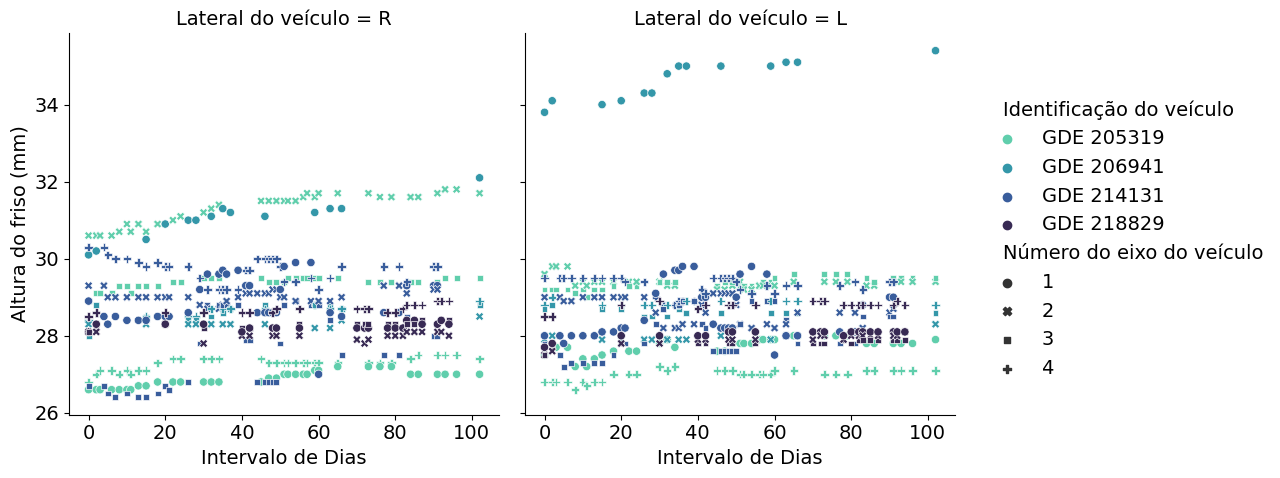

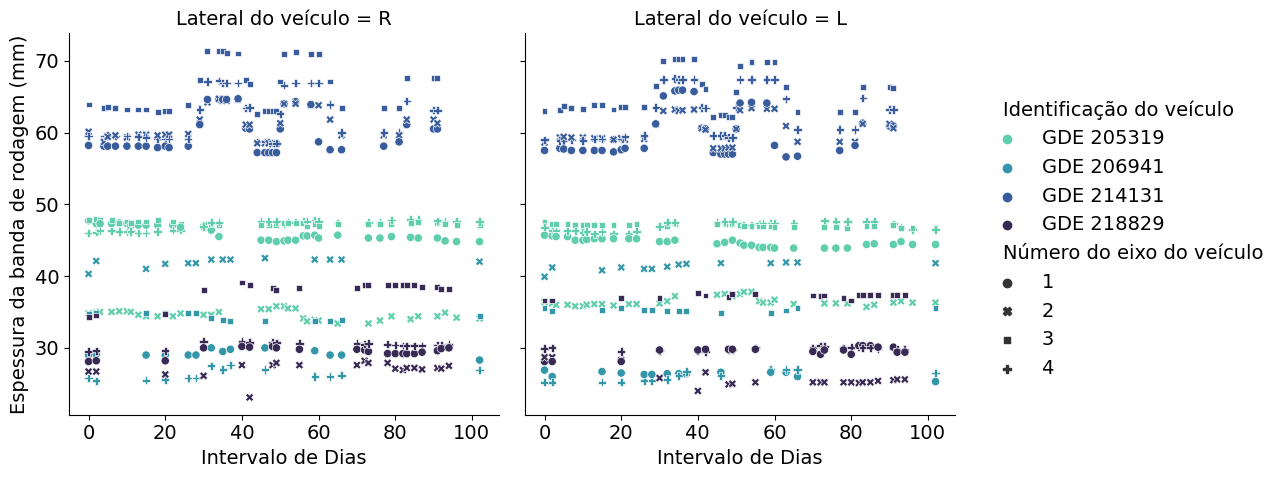

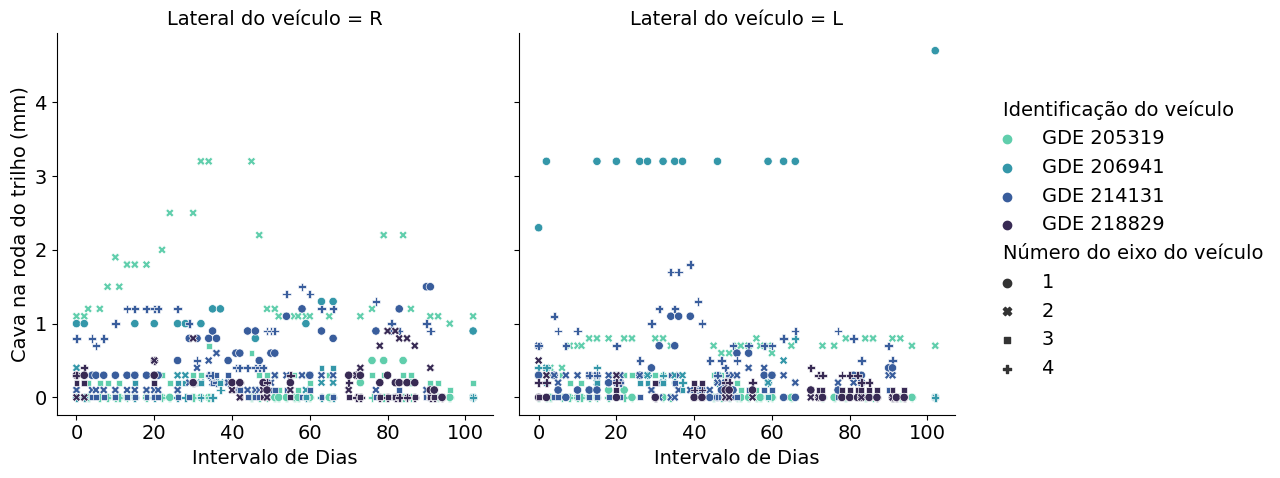

In [60]:
columns1 = ['Espessura do friso (mm)', 'Altura do friso (mm)', 'Espessura da banda de rodagem (mm)', 'Cava na roda do trilho (mm)']
porvagao(data.loc[data['Número do eixo do veículo'].apply(lambda x: x in ['GDE 214131','GDE 218829', 'GDE 206941','GDE 205319', 'GDE 206429'])],columns1)

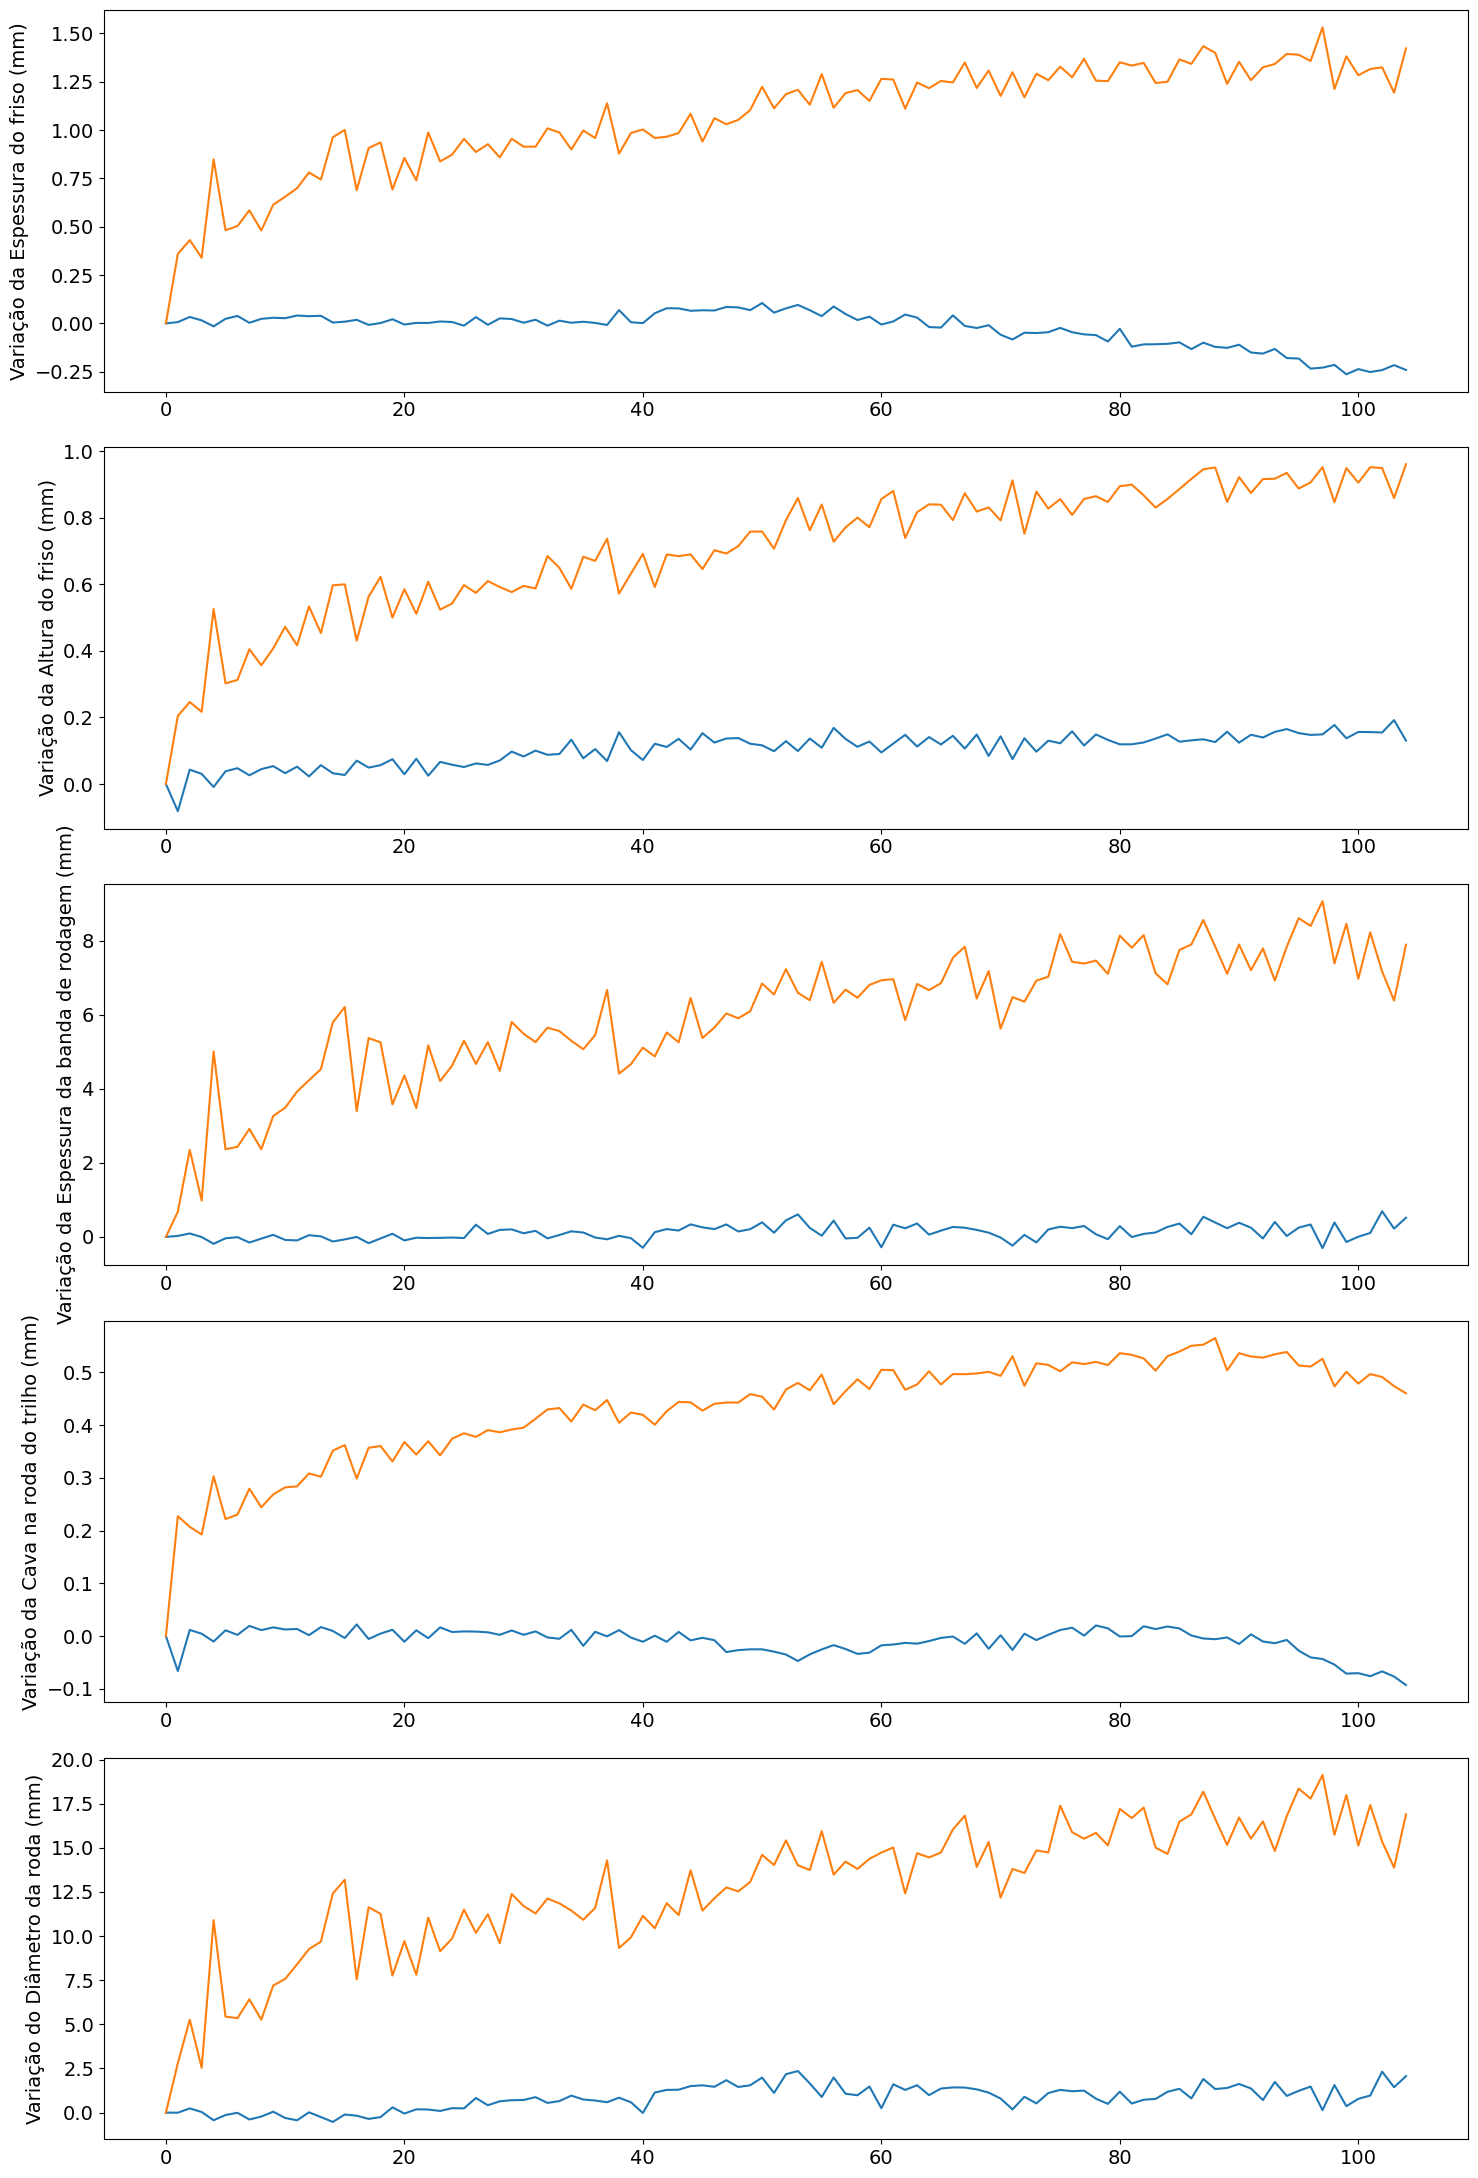

In [41]:
columns1 = ['Variação da Espessura do friso (mm)', 'Variação da Altura do friso (mm)', 'Variação da Espessura da banda de rodagem (mm)', 'Variação da Cava na roda do trilho (mm)', 'Variação do Diâmetro da roda (mm)']
fig = plt.figure(figsize=(15,22))
for col,i in zip(columns1,range(len(columns1))):
    
    data_mean = data.groupby(['Intervalo de Dias'])[col].agg(['mean','std'])
    
    plt.subplot(5, 1, i+1)
    plt.plot(data_mean)
    plt.ylabel(str(col))
    plt.tight_layout()

plt.show()

In [68]:
dia = range(105)
lado = ['R','L']
eixo = [1,2,3,4]
columns1 = ['Variação da Espessura do friso (mm)', 'Variação da Altura do friso (mm)', 'Variação da Espessura da banda de rodagem (mm)', 'Variação da Cava na roda do trilho (mm)', 'Variação do Diâmetro da roda (mm)']
for (a,b,c) in product(dia,lado,eixo):
    data_group = datax.groupby(['Intervalo de Dias','Lateral do veículo','Número do eixo do veículo']).get_group((a,b,c)) #a = dia, b = R ou L e c = 1,2,3 ou 4)
    idx = data_group.index.tolist()
    
    for coluna in columns1:
        datax.loc[ idx, ['Mean_' + str(coluna)]] = data_group[coluna].agg('mean')
        datax.loc[ idx, ['Std_' + str(coluna)]] = data_group[coluna].agg('std')

In [6]:
data.drop(['Unnamed: 0', 'StdVariação do Diâmetro da roda (mm)', 'StdVariação da Cava na roda do trilho (mm)', 'StdVariação da Espessura da banda de rodagem (mm)', ],axis=1,inplace=True)

KeyError: "['StdVariação do Diâmetro da roda (mm)'\n 'StdVariação da Cava na roda do trilho (mm)'\n 'StdVariação da Espessura da banda de rodagem (mm)'] not found in axis"

In [84]:
data.drop(['StdVariação da Altura do friso (mm)'],axis=1,inplace=True)

In [86]:
data.drop(['StdVariação da Espessura do friso (mm)'],axis=1,inplace=True)
data

,Número do veículo,Número do eixo do trem,Identificação do veículo,Número do eixo do veículo,Lateral do veículo,Velocidade do eixo,Extremidade do eixo,Lateral da linha,Espessura do friso (mm),Alerta de espessura do friso,...,Mean_Variação da Espessura do friso (mm),Mean_Variação da Altura do friso (mm),Mean_Variação da Espessura da banda de rodagem (mm),Mean_Variação da Cava na roda do trilho (mm),Mean_Variação do Diâmetro da roda (mm),Std_Variação da Espessura do friso (mm),Std_Variação da Altura do friso (mm),Std_Variação da Espessura da banda de rodagem (mm),Std_Variação da Cava na roda do trilho (mm),Std_Variação do Diâmetro da roda (mm)
0,86,348,GDE 212465,4,L,56,B,Próximo,32.3,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,87,349,GDE 212464,1,R,56,B,Distante,29.7,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,87,349,GDE 212464,1,L,56,B,Próximo,29.7,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,87,350,GDE 212464,2,R,56,B,Distante,26.4,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,87,350,GDE 212464,2,L,56,B,Próximo,26.0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536947,177,713,GDE 205430,4,L,51,A,Distante,24.9,0,...,-0.216505,0.141100,0.784142,-0.102589,2.401294,1.328613,0.984635,8.263244,0.466188,17.667220
1536948,177,713,GDE 205430,4,R,51,A,Próximo,25.8,0,...,-0.283495,0.095793,0.500000,-0.094822,1.349515,1.356688,0.957955,8.211138,0.446748,17.415497
1536949,177,714,GDE 205430,3,L,51,A,Distante,24.3,0,...,-0.270227,0.081553,0.750162,-0.104854,2.844660,1.617082,0.990548,8.320369,0.486515,17.702130
1536950,175,707,GDE 213800,2,R,51,A,Próximo,28.6,0,...,-0.298893,0.176072,0.211342,-0.078285,1.260028,1.176748,0.837980,6.411080,0.420475,14.212725


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536952 entries, 0 to 1536951
Data columns (total 34 columns):
 #   Column                                               Non-Null Count    Dtype  
---  ------                                               --------------    -----  
 0   Número do veículo                                    1536952 non-null  int64  
 1   Número do eixo do trem                               1536952 non-null  int64  
 2   Identificação do veículo                             1536952 non-null  object 
 3   Número do eixo do veículo                            1536952 non-null  int64  
 4   Lateral do veículo                                   1536952 non-null  object 
 5   Velocidade do eixo                                   1536952 non-null  int64  
 6   Extremidade do eixo                                  1536952 non-null  object 
 7   Lateral da linha                                     1536952 non-null  object 
 8   Espessura do friso (mm)                   

In [88]:
data.to_csv("datz5.csv")
# com media e std

In [13]:
def densalerta (df, columns1):
    for col1 in columns1:
        sns.displot(x = df[col1], kind="kde")
        plt.tight_layout()
        plt.savefig("dens2" + str(col1) + ".pdf", bbox_inches='tight')
        plt.show()

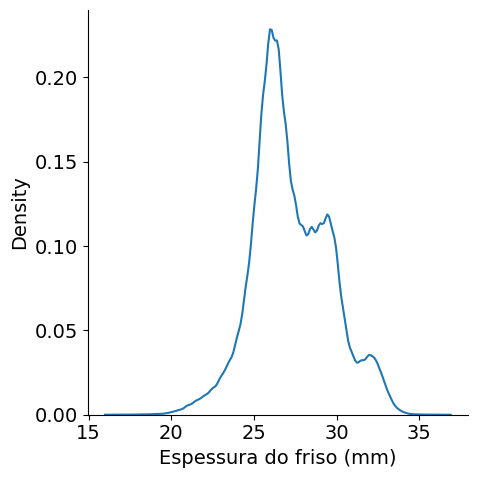

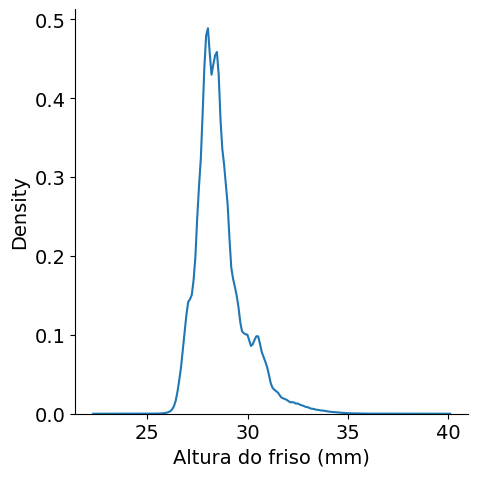

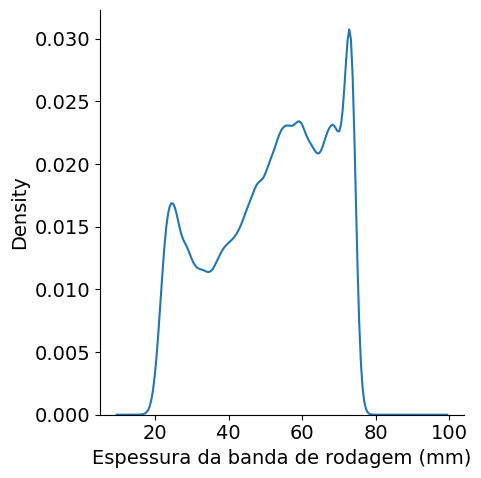

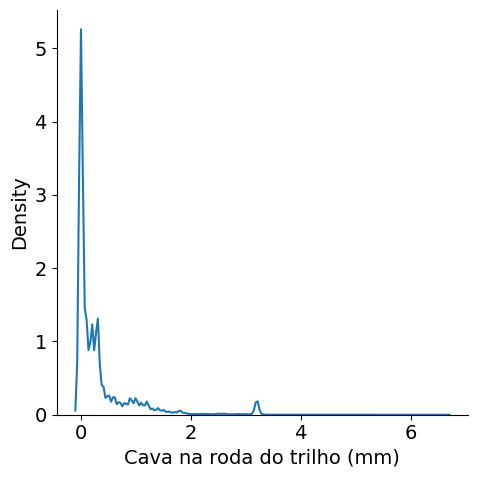

In [14]:
columns1 = ['Espessura do friso (mm)', 'Altura do friso (mm)', 'Espessura da banda de rodagem (mm)', 'Cava na roda do trilho (mm)']
columns2=['Alerta de espessura do friso', 'Alerta de altura do friso', 'Alerta de espessura da banda de rodagem', 'Alerta de cava na roda']
densalerta(data, columns1)